In [1]:
data_path='/srv/gsfs0/projects/snyder/oursu/software/git/public_genomedisco/genomedisco'

In [2]:
require(ggplot2)
require(pheatmap)
#install.packages('gplots')
require(gplots)
require(sfsmisc)


Loading required package: ggplot2
Loading required package: pheatmap
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: sfsmisc


In [3]:
metadata=read.table(paste(data_path,'/paper_analysis/2017-06-08/real/LA_metadata.txt',sep=''),header=TRUE,sep='\t')
rownames(metadata)=metadata$library
metadata$crosslinking=gsub('FA 10min RT','',metadata$crosslinking)
print(head(metadata))
print(summary(metadata))
print(unique(metadata$crosslinking))

train_data=metadata[seq(1,dim(metadata)[1],2),]
test_data=metadata[seq(2,dim(metadata)[1],2),]
print(dim(train_data))
print(dim(test_data))

       library celltype biorep         protocol   re crosslinking
HIC001  HIC001  GM12878      1 tethered in situ MboI          1% 
HIC002  HIC002  GM12878      1 tethered in situ MboI          1% 
HIC003  HIC003  GM12878      1          in situ MboI          1% 
HIC004  HIC004  GM12878      1          in situ MboI          1% 
HIC005  HIC005  GM12878      1          in situ MboI          1% 
HIC006  HIC006  GM12878      1          in situ MboI          1% 
       biotynilatedBase ligationVolume totalReads totalContacts
HIC001         bio-dCTP          1.2ml  202095066     148358011
HIC002         bio-dCTP          1.2ml  413230948     232985572
HIC003         bio-dATP          1.2ml  486848169     393983023
HIC004         bio-dATP          1.2ml  160649365     130829245
HIC005         bio-dATP          1.2ml  304049399     247790014
HIC006         bio-dATP          1.2ml  153771943     126776812
    library              celltype      biorep      
 HIC001 : 1   GM12878        :49   Min

In [4]:
#read in files across the chromosomes to get genomewide scores
first=TRUE
chromos=c(1:22)

generic_file='/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/results/genomedisco/summary/res40000.chrCHROMO.scoresByStep.txt'
for (chromo in chromos){
    current_scores=read.table(gsub('CHROMO',chromo,generic_file),fill=TRUE)
    #print(current_scores)
    rownames(current_scores)=paste(current_scores[,1],current_scores[,2])
    #n=dim(current_scores)[2]
    n=7
    if (first==FALSE){
        genomewide[,3:n]=genomewide[,3:n]+current_scores[rownames(genomewide),3:n]
    }
    if (first==TRUE){
        genomewide=current_scores
        first=FALSE
    }
}
disco=genomewide
disco[,3:n]=1-disco[,3:n]/length(chromos)
print('disco')
print(head(disco))


get_genomewide=function(generic_file,chromos){
    first=TRUE
    for (chromo in chromos){
        current_scores=read.table(gsub('CHROMO',chromo,generic_file),fill=TRUE)
        #print(current_scores)
        rownames(current_scores)=paste(current_scores[,1],current_scores[,2])
        #n=dim(current_scores)[2]
        if (first==FALSE){
            genomewide[,3]=genomewide[,3]+current_scores[rownames(genomewide),3]
        }
        if (first==TRUE){
            genomewide=current_scores
            first=FALSE
        }
    }
    genomewide[,3]=genomewide[,3]/length(chromos)
    return(genomewide)
}

#hicrep scores
hicrep_file='/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/results/hicrep/summary/hicrep.res40000.chrCHROMO.txt'
hicrep_scores=get_genomewide(hicrep_file,chromos)
print('hicrep')
print(head(hicrep_scores))

hicspector_file='/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/results/hic-spector/summary/hic-spector.res40000.chrCHROMO.txt'
hicspector_scores=get_genomewide(hicspector_file,chromos)
print('hicspector')
print(head(hicspector_scores))


[1] "disco"
                  V1     V2          V3        V4        V5        V6        V7
HIC001 HIC003 HIC001 HIC003  0.34095455 0.8101818 0.8969545 0.9205000 0.9297273
HIC001 HIC005 HIC001 HIC005  0.32640909 0.8023182 0.8882273 0.9120455 0.9219091
HIC001 HIC007 HIC001 HIC007  0.31254545 0.7980455 0.8883636 0.9128636 0.9229545
HIC001 HIC009 HIC001 HIC009  0.20359091 0.7433636 0.8569545 0.8903636 0.9054545
HIC001 HIC011 HIC001 HIC011  0.07213636 0.6625000 0.8241364 0.8726818 0.8946364
HIC001 HIC013 HIC001 HIC013 -0.00550000 0.5537727 0.6649545 0.6749091 0.6717727
[1] "hicrep"
                  V1     V2        V3
HIC001 HIC003 HIC001 HIC003 0.9539648
HIC001 HIC005 HIC001 HIC005 0.9491835
HIC001 HIC007 HIC001 HIC007 0.9427484
HIC001 HIC009 HIC001 HIC009 0.9499901
HIC001 HIC011 HIC001 HIC011 0.9335338
HIC001 HIC013 HIC001 HIC013 0.4340579
[1] "hicspector"
                  V1     V2        V3
HIC001 HIC003 HIC001 HIC003 0.5624619
HIC001 HIC005 HIC001 HIC005 0.5208598
HIC001 HIC007 HIC0

[1] 465  15
                  V1     V2         V3        V4        V5        V6        V7
HIC003 HIC005 HIC003 HIC005 0.42595455 0.8599091 0.9298182 0.9501364 0.9595000
HIC003 HIC007 HIC003 HIC007 0.32627273 0.8218182 0.9142727 0.9412727 0.9531364
HIC003 HIC009 HIC003 HIC009 0.21622727 0.7669545 0.8758636 0.9063636 0.9198182
HIC003 HIC011 HIC003 HIC011 0.07922727 0.6836818 0.8415455 0.8875455 0.9084545
HIC003 HIC013 HIC003 HIC013 0.01372727 0.5830455 0.6969545 0.7097727 0.7087273
HIC003 HIC015 HIC003 HIC015 0.12968182 0.6877273 0.7746364 0.7894091 0.7950909
               seqdepth   cell1   cell2  re1  re2 crosslinking biorep re
HIC003 HIC005 304049399 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC003 HIC007 182893710 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC003 HIC009 117634613 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC003 HIC011  55817881 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC003 HIC013  84913545 GM12878 GM12878 MboI MboI      1%  1%       1 

Loading required package: PRROC


[1] "disco_train"


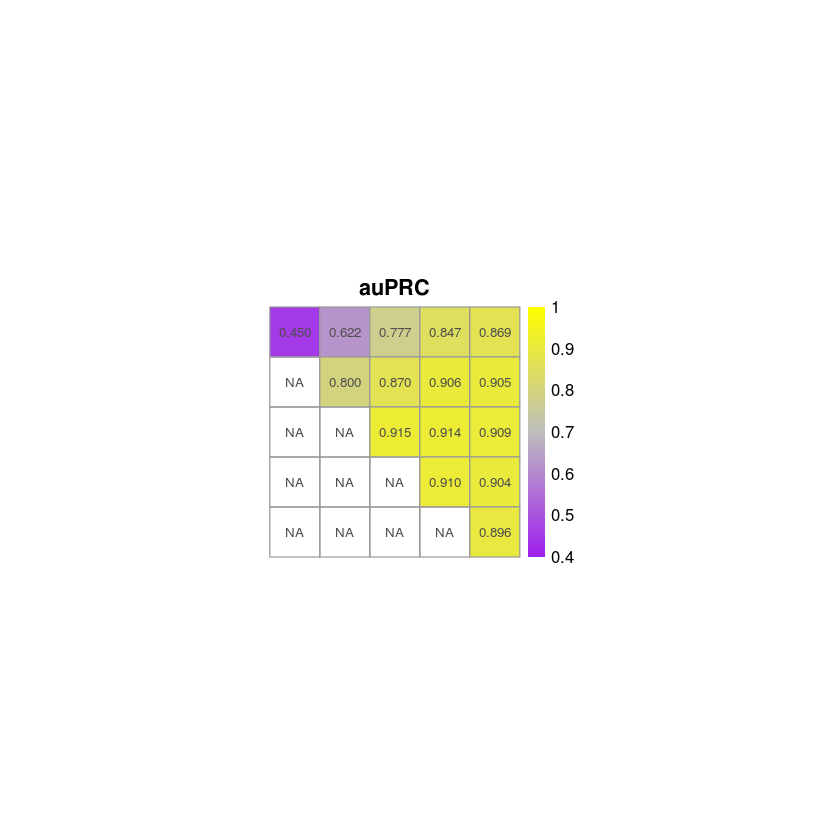

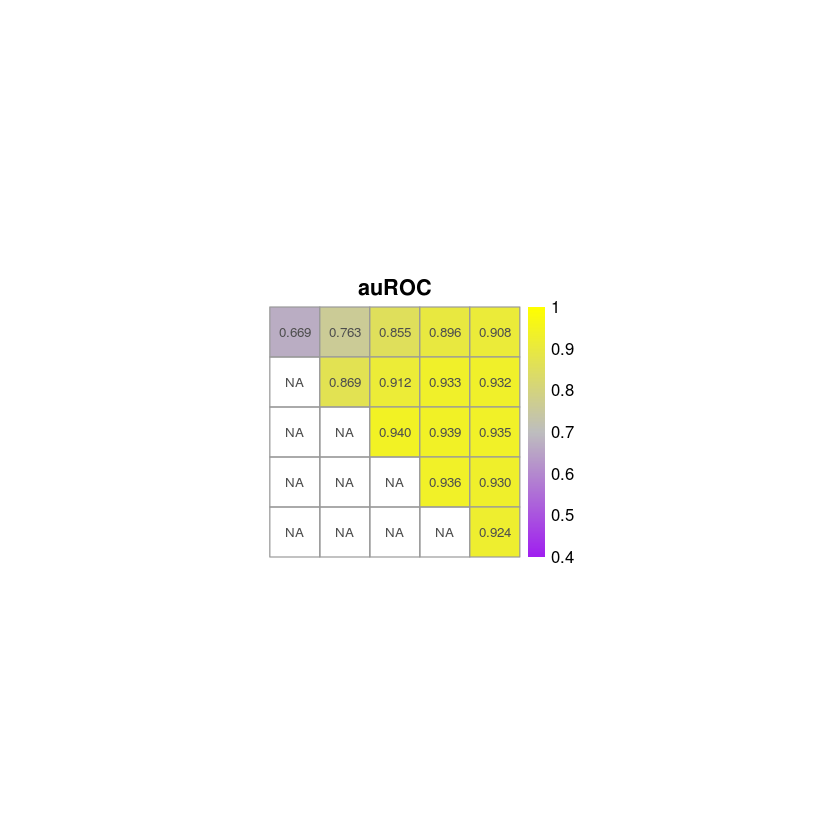

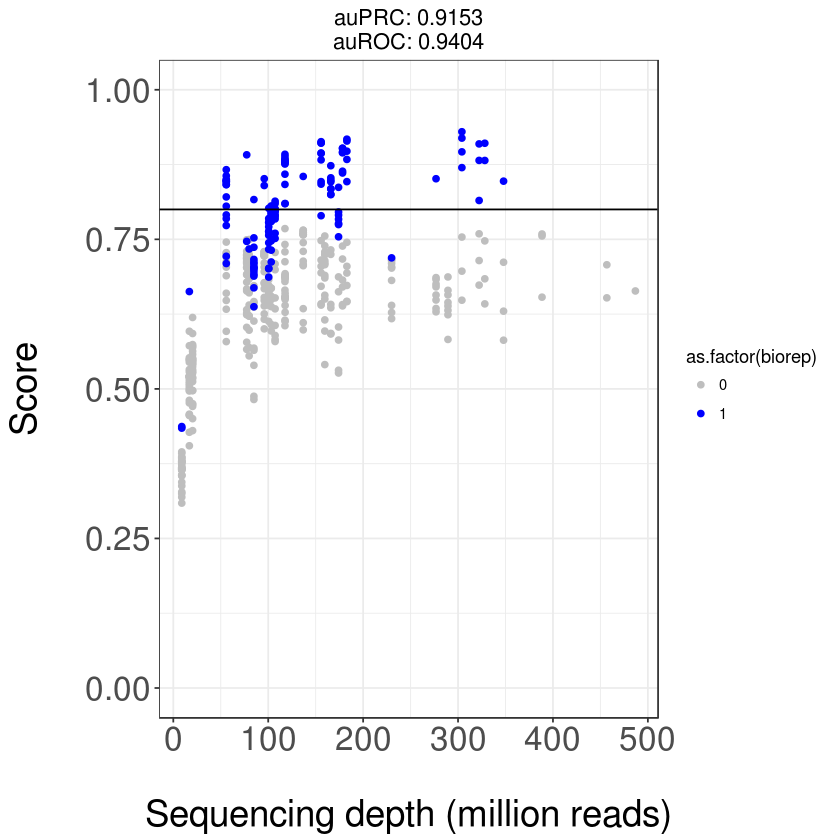

In [5]:
check_parameters=function(scores,metadata,is_disco,out,thresh,method){
    
    numscores=dim(scores)[2]-2
    keep=intersect(which(as.character(scores[,1]) %in% rownames(metadata)),
                   which(as.character(scores[,2]) %in% rownames(metadata)))
    scores=scores[keep,]
    
    scores=data.frame(scores,seqdepth=apply(data.frame(metadata[as.character(scores[,1]),'totalReads'],metadata[as.character(scores[,2]),'totalReads']),1,min), #log(metadata[as.character(scores[,1]),'totalReads'],10),#
                      cell1=metadata[as.character(scores[,1]),'celltype'],
                      cell2=metadata[as.character(scores[,2]),'celltype'],
                      re1=metadata[as.character(scores[,1]),'re'],
                      re2=metadata[as.character(scores[,2]),'re'],
                      crosslinking=paste(metadata[as.character(scores[,1]),'crosslinking'],metadata[as.character(scores[,2]),'crosslinking']))
    scores=data.frame(scores,biorep=0,re=0)
    scores[which(scores[,'cell1']==scores[,'cell2']),'biorep']=1
    scores[which(scores[,'re1']==scores[,'re2']),'re']=1
    
    in_situ_samples=rownames(metadata[which(as.character(metadata$protocol)=="in situ"),])
    in_situ=intersect(which(as.character(scores[,1]) %in% in_situ_samples),which(as.character(scores[,2]) %in% in_situ_samples))
    sna=rownames(metadata[which(is.na(metadata$crosslinking)),])
    bad_crosslink=union(which(as.character(scores[,1]) %in% sna),which(as.character(scores[,2]) %in% sna))
    good_seqdepth=which(scores$seqdepth>=0)#100000000)
    mbo=intersect(which(as.character(scores[,1]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])),
              which(as.character(scores[,2]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])))
    keep=setdiff(intersect(in_situ,good_seqdepth),bad_crosslink)
    
    scores=scores[keep,]
    
    print(dim(scores))
    print(head(scores))
    require(PRROC)
    
    prs=as.matrix(array(NA,dim=c(numscores,numscores)))
    rocs=prs=as.matrix(array(NA,dim=c(numscores,numscores)))
    for (s1 in c(1:numscores)){
        for (s2 in c(s1:numscores)){
            if (s1==s2){
                current_scores=scores[,2+s1]
            }
            else{
                current_scores=c()
                for (i in c(1:(dim(scores)[1]))){
                    y=scores[i,(s1+2):(s2+2)]
                    x=c(s1:s2)
                    current_scores=c(current_scores,integrate.xy(x,y)/length(x))
                }
            }
            scores_0=current_scores[which(as.character(scores[,'biorep'])=='0')]
            scores_1=current_scores[which(as.character(scores[,'biorep'])=='1')]
            roc=roc.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
            pr=pr.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
            #print(pr)
            #print(names(roc))
            prs[s1,s2]=pr$auc.integral
            rocs[s1,s2]=roc$auc
        }
    }
    
    pheatmap(prs,cluster_rows=F,cluster_cols=F,display_numbers=T,number_format = "%.3f",
             cellwidth=30,cellheight=30,fontsize=10,breaks=seq(from=0.4,to=1,by=0.6/200),
        color=colorRampPalette(c("purple","gray","yellow"))(n = 200),main='auPRC')
    pheatmap(rocs,cluster_rows=F,cluster_cols=F,display_numbers=T,number_format = "%.3f",
             cellwidth=30,cellheight=30,fontsize=10,breaks=seq(from=0.4,to=1,by=0.6/200),
        color=colorRampPalette(c("purple","gray","yellow"))(n = 200),main='auROC')
    
    if (is_disco==TRUE){
    s1=3
    s2=3
    if (s1==s2){
        current_scores=scores[,2+s1]
    }
    else{
        current_scores=c()
        for (i in c(1:(dim(scores)[1]))){
            y=scores[i,(s1+2):(s2+2)]
            x=c(s1:s2)
            current_scores=c(current_scores,integrate.xy(x,y)/length(x))
        } 
    }
    }
    else{
        current_scores=scores[,3]
    }
    scores_0=current_scores[which(as.character(scores[,'biorep'])=='0')]
    scores_1=current_scores[which(as.character(scores[,'biorep'])=='1')]
    roc=roc.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
    pr=pr.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
    #plot(pr)
    #plot(roc)
    scores_plot=data.frame(scores,toplot=current_scores)
    
    pdf(out,width=7,height=7)
    scores_plot=scores_plot[order(scores_plot$biorep),]
    scores_plot=data.frame(scores_plot,comparison=paste(scores_plot[,1],scores_plot[,2]))
    print(method)
    #print(scores_plot[which(scores_plot$biorep==1),])
    p=ggplot(scores_plot,aes(x=seqdepth/1000000,y=toplot,color=as.factor(biorep),label=comparison))+
          xlab('\nSequencing depth (million reads)')+ylab('Score\n')+
          geom_point()+scale_color_manual(values = c("gray","blue"))+theme_bw()+
          #geom_text(aes(label=comparison),hjust=0, vjust=0)+
          theme(plot.title = element_text(hjust = 0.5))+
          theme(axis.title.y = element_text(size = rel(2), angle = 90))+
         theme(axis.title.x = element_text(size = rel(2), angle = 0))+
          ggtitle(paste('auPRC: ',round(pr$auc.integral,4),'\nauROC: ',round(roc$auc,4),sep=''))+
          theme(axis.text.x = element_text(size=20))+
          theme(axis.text.y = element_text(size=20))+
          ylim(0,1)+
          geom_hline(yintercept = thresh)
    print(p)
    dev.off()
    print(p)
}

check_parameters(disco,train_data,T,
                '/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/plots/disco.txt.train.pdf',
                 0.8,'disco_train')


[1] 465  15
                  V1     V2         V3        V4        V5        V6        V7
HIC004 HIC006 HIC004 HIC006 0.30072727 0.8194545 0.9156364 0.9440000 0.9569091
HIC004 HIC008 HIC004 HIC008 0.28859091 0.8185000 0.9104545 0.9361818 0.9472727
HIC004 HIC010 HIC004 HIC010 0.07645455 0.6999091 0.8566364 0.9011364 0.9201364
HIC004 HIC012 HIC004 HIC012 0.20113636 0.7311818 0.7970909 0.7983182 0.7921364
HIC004 HIC014 HIC004 HIC014 0.17731818 0.6704091 0.7010000 0.6892273 0.6760000
HIC004 HIC016 HIC004 HIC016 0.12531818 0.7070000 0.7919545 0.8030909 0.8050000
               seqdepth   cell1   cell2  re1  re2 crosslinking biorep re
HIC004 HIC006 153771943 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC008 160649365 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC010  55813939 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC012 160649365 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC014 160649365 GM12878 GM12878 MboI MboI      1%  1%       1 

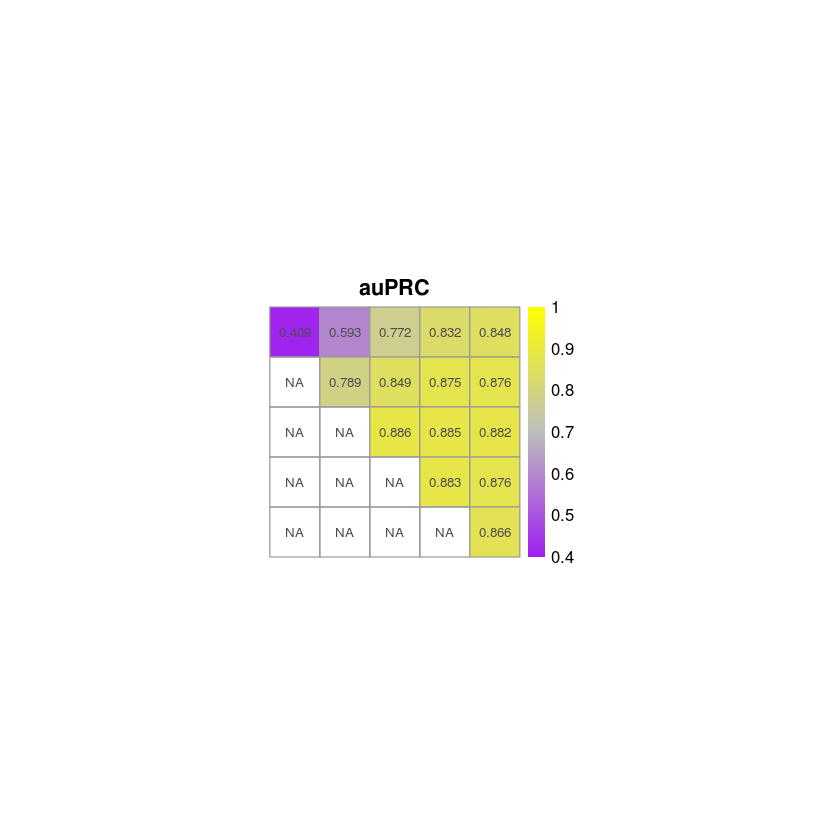

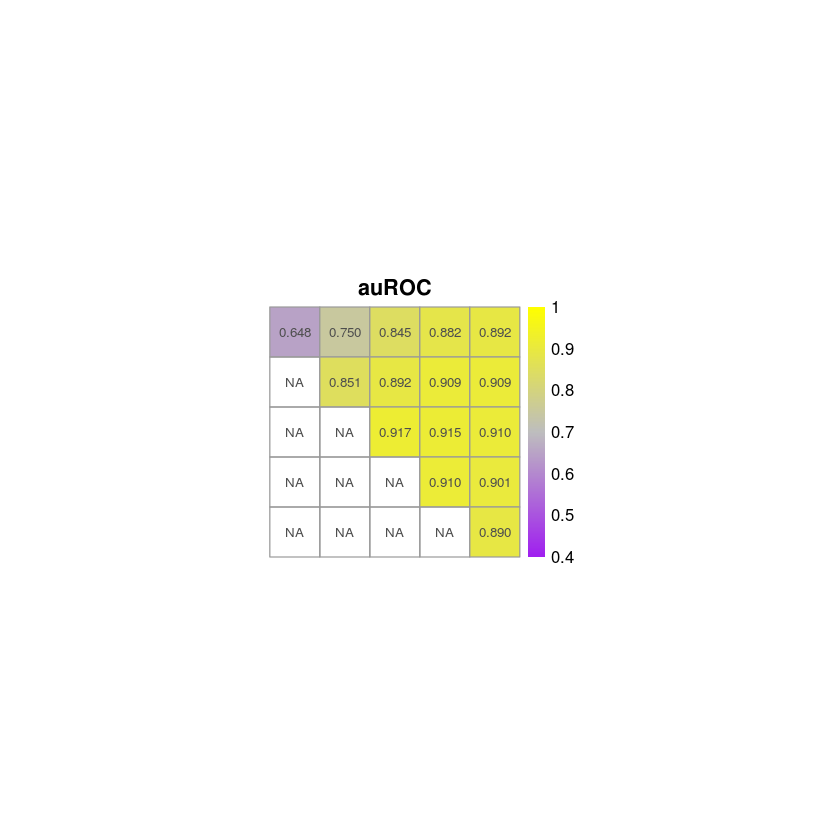

[1] 465  11
                  V1     V2        V3  seqdepth   cell1   cell2  re1  re2
HIC004 HIC006 HIC004 HIC006 0.9706213 153771943 GM12878 GM12878 MboI MboI
HIC004 HIC008 HIC004 HIC008 0.9691949 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC010 HIC004 HIC010 0.9371252  55813939 GM12878 GM12878 MboI MboI
HIC004 HIC012 HIC004 HIC012 0.6229497 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC014 HIC004 HIC014 0.4373818 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC016 HIC004 HIC016 0.7592212 160649365 GM12878 GM12878 MboI MboI
              crosslinking biorep re
HIC004 HIC006      1%  1%       1  1
HIC004 HIC008      1%  1%       1  1
HIC004 HIC010      1%  1%       1  1
HIC004 HIC012      1%  1%       1  1
HIC004 HIC014      1%  1%       1  1
HIC004 HIC016      1%  1%       1  1


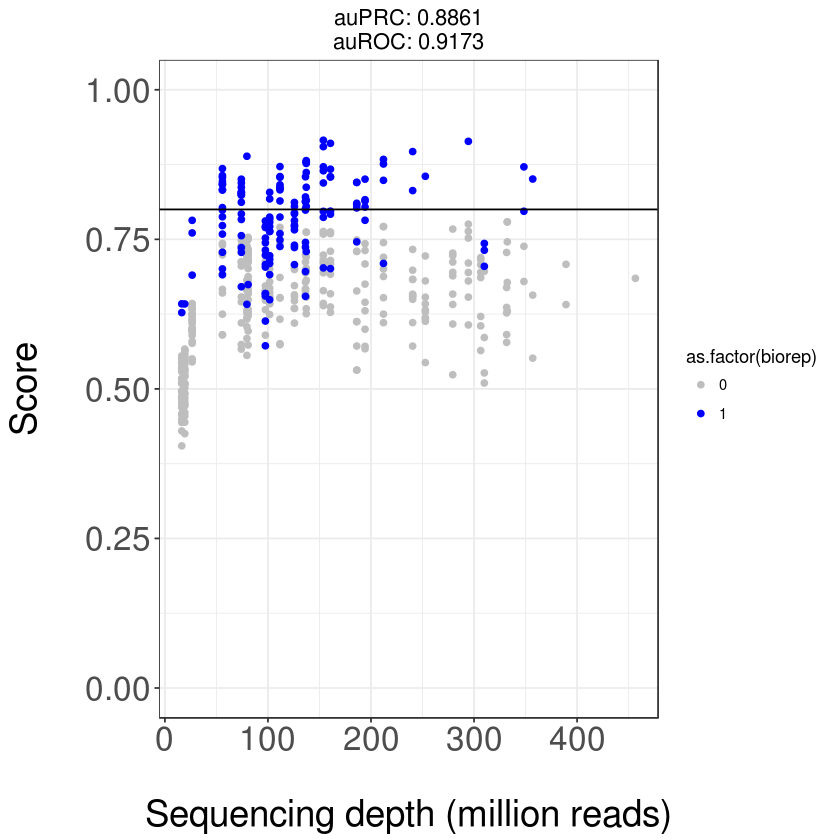

[1] "hicrep"


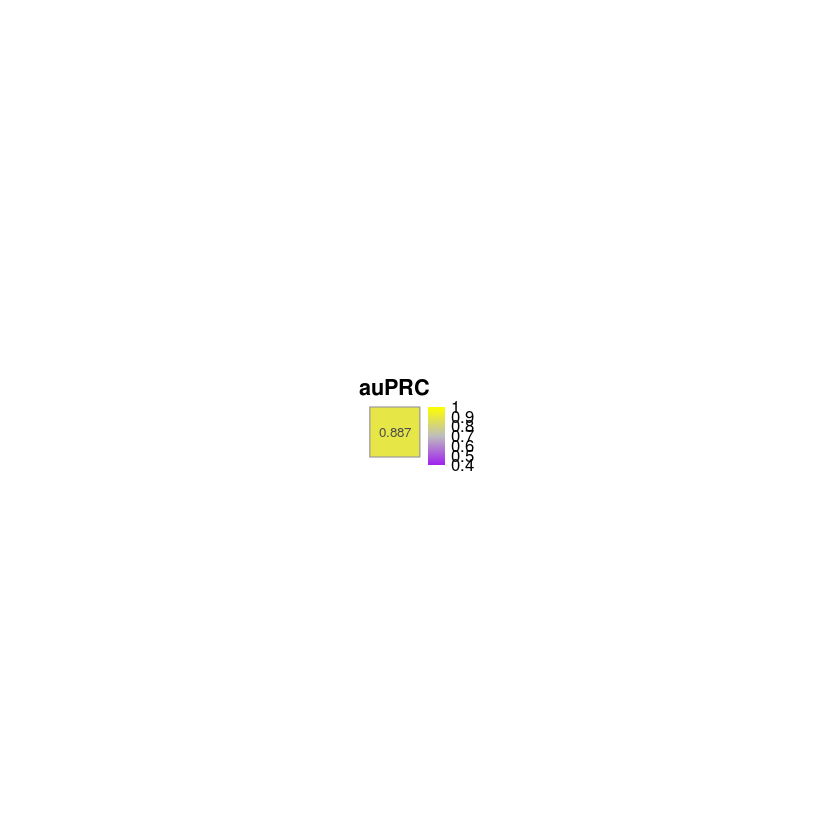

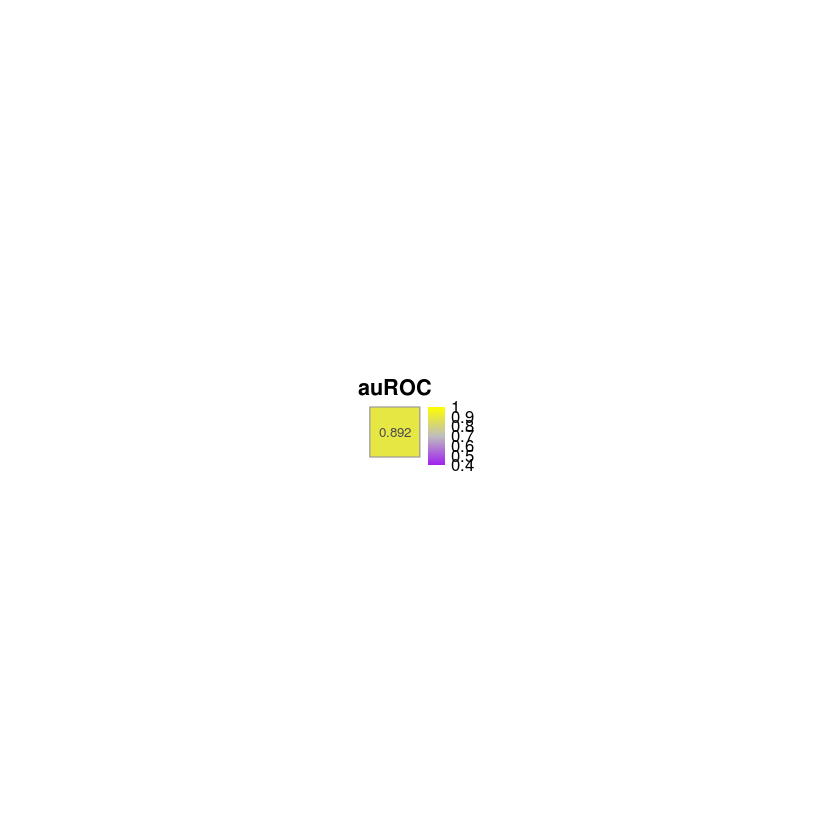

[1] 465  11
                  V1     V2        V3  seqdepth   cell1   cell2  re1  re2
HIC004 HIC006 HIC004 HIC006 0.8265234 153771943 GM12878 GM12878 MboI MboI
HIC004 HIC008 HIC004 HIC008 0.6894739 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC010 HIC004 HIC010 0.6742991  55813939 GM12878 GM12878 MboI MboI
HIC004 HIC012 HIC004 HIC012 0.2713952 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC014 HIC004 HIC014 0.2149447 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC016 HIC004 HIC016 0.3675040 160649365 GM12878 GM12878 MboI MboI
              crosslinking biorep re
HIC004 HIC006      1%  1%       1  1
HIC004 HIC008      1%  1%       1  1
HIC004 HIC010      1%  1%       1  1
HIC004 HIC012      1%  1%       1  1
HIC004 HIC014      1%  1%       1  1
HIC004 HIC016      1%  1%       1  1


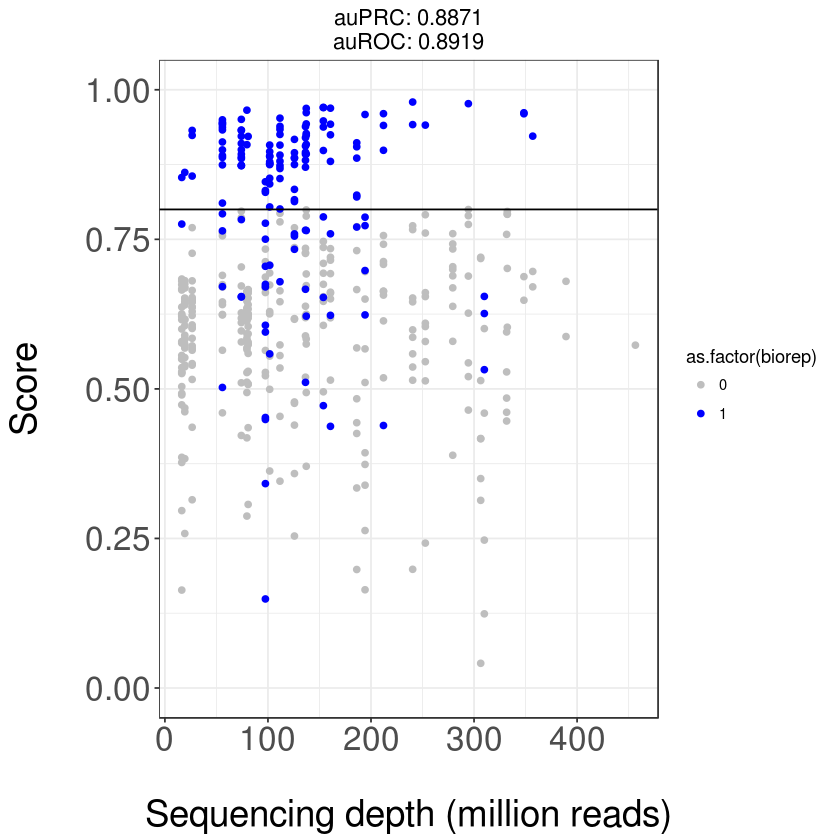

[1] "hic-spector"


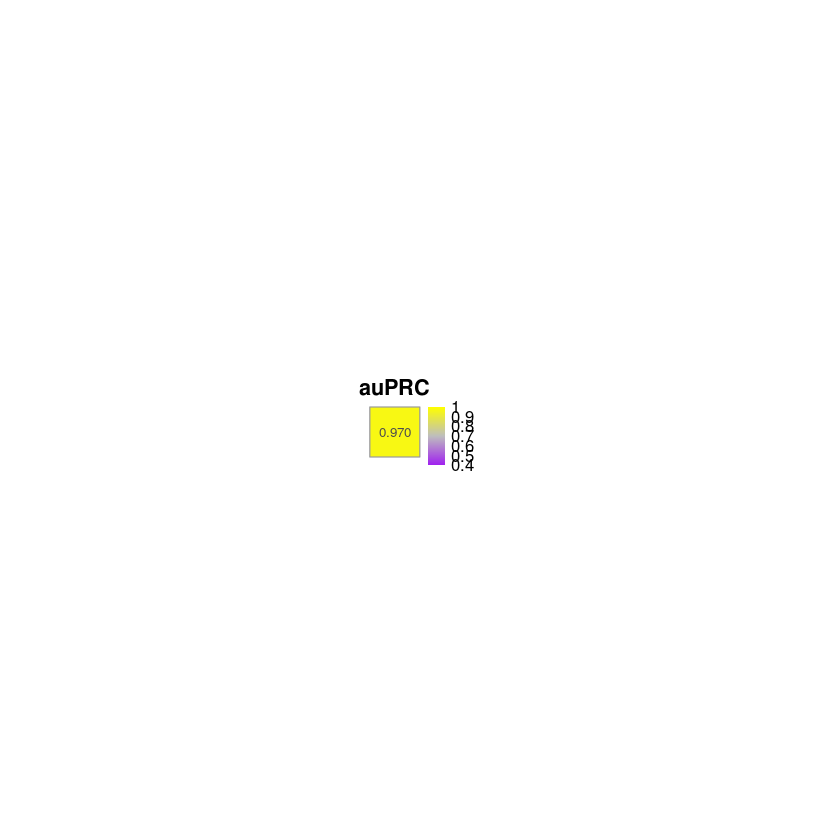

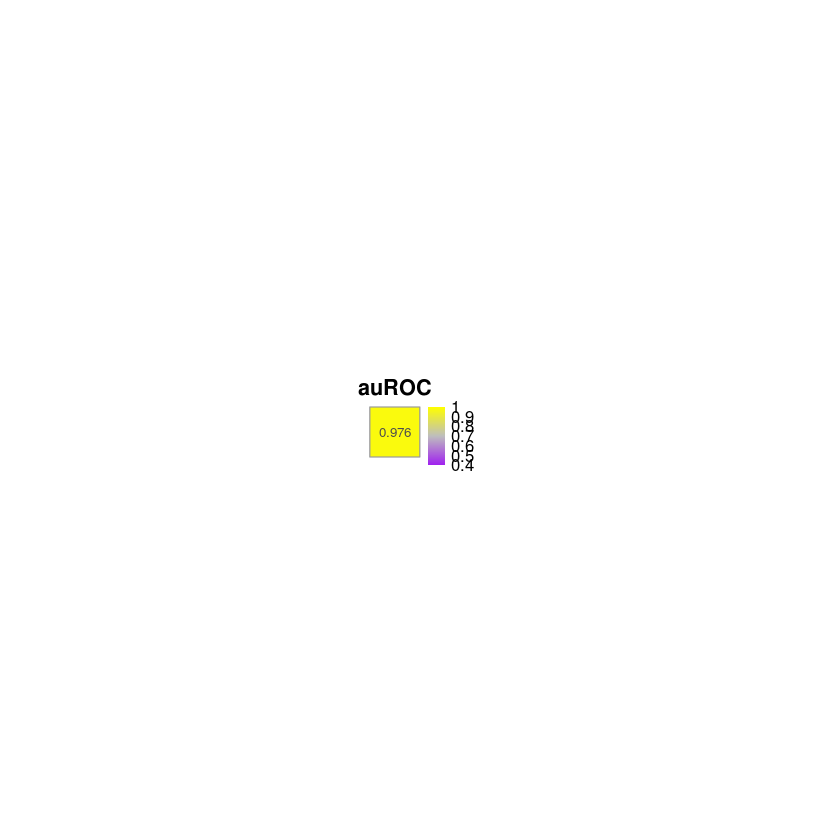

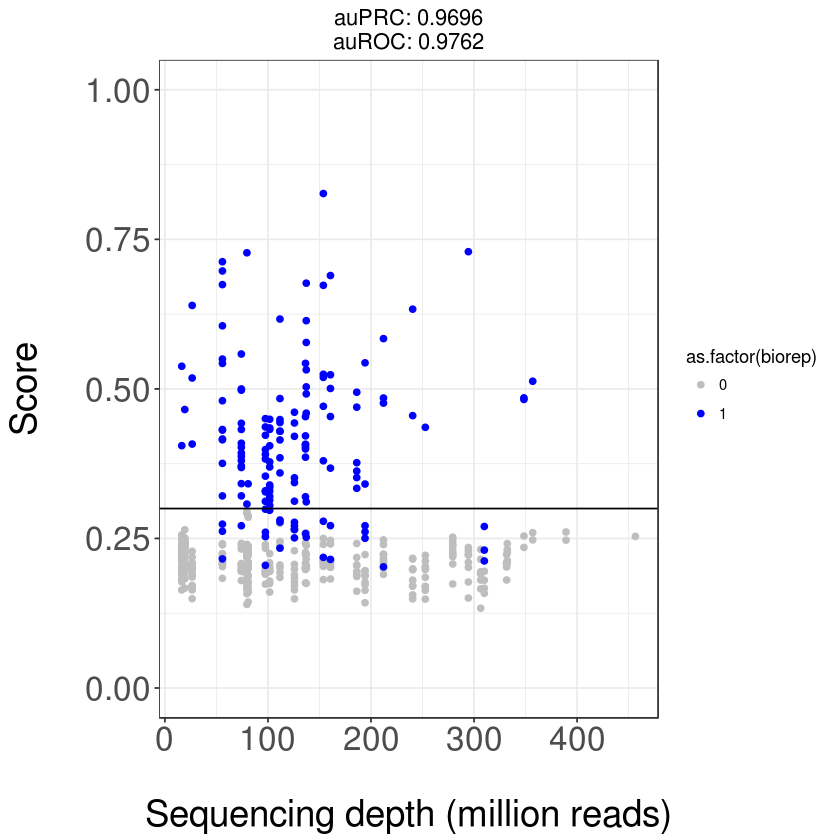

In [6]:
check_parameters(disco,test_data,T,
                '/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/plots/disco.scores.txt.test.pdf',
                 0.8,'disco_test')

check_parameters(hicrep_scores,test_data,F,
                '/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/plots/hicrep.scores.txt.test.pdf',
                 0.8,'hicrep')

check_parameters(hicspector_scores,test_data,F,
                '/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/plots/hic-spector.scores.txt.test.pdf',
                 0.3,'hic-spector')

[1] "scores1"
                  V1     V2        V3  seqdepth   cell1   cell2  re1  re2
HIC004 HIC006 HIC004 HIC006 0.9156364 153771943 GM12878 GM12878 MboI MboI
HIC004 HIC008 HIC004 HIC008 0.9104545 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC010 HIC004 HIC010 0.8566364  55813939 GM12878 GM12878 MboI MboI
HIC004 HIC012 HIC004 HIC012 0.7970909 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC014 HIC004 HIC014 0.7010000 160649365 GM12878 GM12878 MboI MboI
HIC004 HIC016 HIC004 HIC016 0.7919545 160649365 GM12878 GM12878 MboI MboI
              crosslinking biorep re
HIC004 HIC006      1%  1%       1  1
HIC004 HIC008      1%  1%       1  1
HIC004 HIC010      1%  1%       1  1
HIC004 HIC012      1%  1%       1  1
HIC004 HIC014      1%  1%       1  1
HIC004 HIC016      1%  1%       1  1
[1] "scores2"
                  V1     V2        V3  seqdepth   cell1   cell2  re1  re2
HIC004 HIC006 HIC004 HIC006 0.9706213 153771943 GM12878 GM12878 MboI MboI
HIC004 HIC008 HIC004 HIC008 0.9691949 160649365

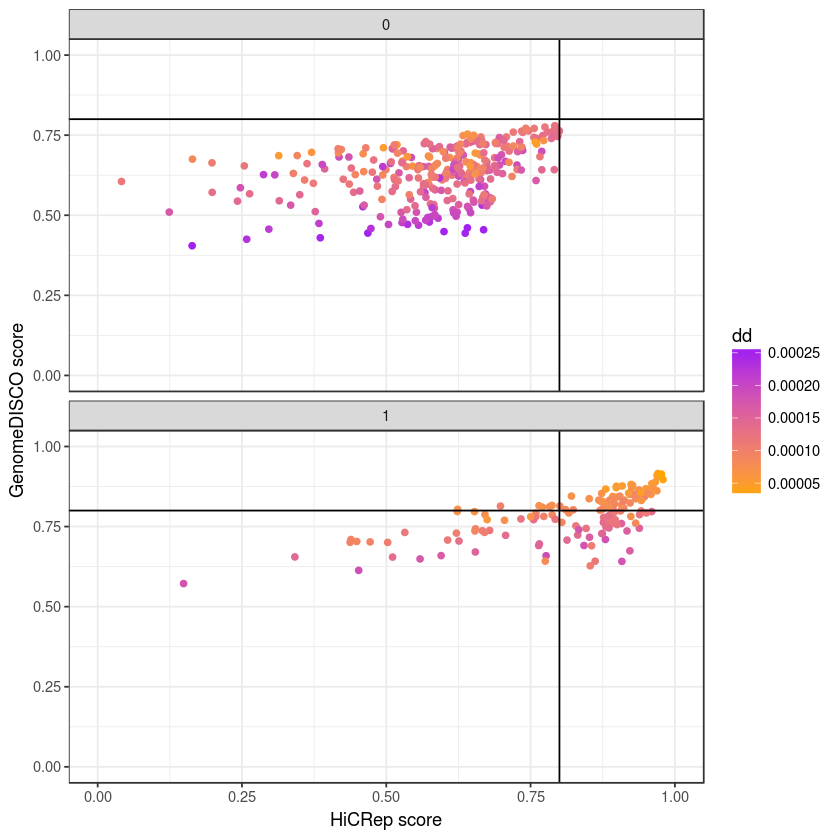

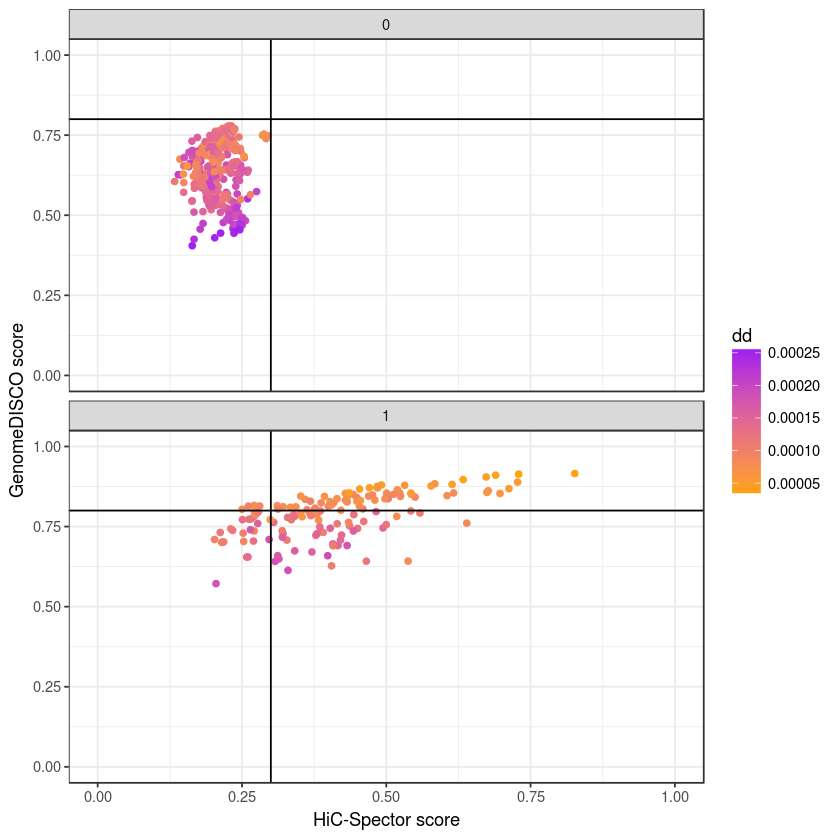

In [9]:
compare_methods=function(scores1,scores2,ddfile,c1,c2,s1name,s2name,metadata,thresh,out){
    scores=scores1
    keep=intersect(which(as.character(scores[,1]) %in% rownames(metadata)),
                   which(as.character(scores[,2]) %in% rownames(metadata)))
    scores=scores[keep,]
    
    scores=data.frame(scores,seqdepth=apply(data.frame(metadata[as.character(scores[,1]),'totalReads'],metadata[as.character(scores[,2]),'totalReads']),1,min), #log(metadata[as.character(scores[,1]),'totalReads'],10),#
                      cell1=metadata[as.character(scores[,1]),'celltype'],
                      cell2=metadata[as.character(scores[,2]),'celltype'],
                      re1=metadata[as.character(scores[,1]),'re'],
                      re2=metadata[as.character(scores[,2]),'re'],
                      crosslinking=paste(metadata[as.character(scores[,1]),'crosslinking'],metadata[as.character(scores[,2]),'crosslinking']))
    scores=data.frame(scores,biorep=0,re=0)
    scores[which(scores[,'cell1']==scores[,'cell2']),'biorep']=1
    scores[which(scores[,'re1']==scores[,'re2']),'re']=1
    
    in_situ_samples=rownames(metadata[which(as.character(metadata$protocol)=="in situ"),])
    in_situ=intersect(which(as.character(scores[,1]) %in% in_situ_samples),which(as.character(scores[,2]) %in% in_situ_samples))
    sna=rownames(metadata[which(is.na(metadata$crosslinking)),])
    bad_crosslink=union(which(as.character(scores[,1]) %in% sna),which(as.character(scores[,2]) %in% sna))
    good_seqdepth=which(scores$seqdepth>=0)#100000000)
    mbo=intersect(which(as.character(scores[,1]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])),
              which(as.character(scores[,2]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])))
    keep=setdiff(intersect(in_situ,good_seqdepth),bad_crosslink)
    
    scores=scores[keep,]
    rownames(scores)=paste(scores[,1],scores[,2])
    
    scores1=scores
    print('scores1')
    print(head(scores1))
    
    #==========
    scores=scores2
    keep=intersect(which(as.character(scores[,1]) %in% rownames(metadata)),
                   which(as.character(scores[,2]) %in% rownames(metadata)))
    scores=scores[keep,]
    
    scores=data.frame(scores,seqdepth=apply(data.frame(metadata[as.character(scores[,1]),'totalReads'],metadata[as.character(scores[,2]),'totalReads']),1,min), #log(metadata[as.character(scores[,1]),'totalReads'],10),#
                      cell1=metadata[as.character(scores[,1]),'celltype'],
                      cell2=metadata[as.character(scores[,2]),'celltype'],
                      re1=metadata[as.character(scores[,1]),'re'],
                      re2=metadata[as.character(scores[,2]),'re'],
                      crosslinking=paste(metadata[as.character(scores[,1]),'crosslinking'],metadata[as.character(scores[,2]),'crosslinking']))
    scores=data.frame(scores,biorep=0,re=0)
    scores[which(scores[,'cell1']==scores[,'cell2']),'biorep']=1
    scores[which(scores[,'re1']==scores[,'re2']),'re']=1
    
    in_situ_samples=rownames(metadata[which(as.character(metadata$protocol)=="in situ"),])
    in_situ=intersect(which(as.character(scores[,1]) %in% in_situ_samples),which(as.character(scores[,2]) %in% in_situ_samples))
    sna=rownames(metadata[which(is.na(metadata$crosslinking)),])
    bad_crosslink=union(which(as.character(scores[,1]) %in% sna),which(as.character(scores[,2]) %in% sna))
    good_seqdepth=which(scores$seqdepth>=0)#100000000)
    mbo=intersect(which(as.character(scores[,1]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])),
              which(as.character(scores[,2]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])))
    keep=setdiff(intersect(in_situ,good_seqdepth),bad_crosslink)
    
    scores=scores[keep,]
    rownames(scores)=paste(scores[,1],scores[,2])
    
    scores2=scores
    print('scores2')
    print(head(scores2))
    
    dds=read.table(ddfile)
    rownames(dds)=paste(dds[,1],dds[,2])
    
    common=intersect(rownames(scores1),rownames(scores2))
    #print(common)
    
    combined=data.frame(s1=scores1[common,c1],s2=scores2[common,c2],dd=dds[common,8],
                       biorep=scores1[common,'biorep'])
    
    print(dim(combined))
    pdf(out,width=3,height=6)
    p=ggplot(combined,aes(x=s2,y=s1,color=dd))+geom_point()+xlab(s2name)+ylab(s1name)+
         theme_bw()+facet_wrap(~biorep,nrow=2)+scale_colour_gradient(low = "orange", high = "purple")+
         geom_hline(yintercept = 0.8)+geom_vline(xintercept = thresh)+xlim(0,1)+ylim(0,1)
    print(p)
    dev.off()
    print(p)
    
}

disco_scores=disco[,c(1,2,5)]
colnames(disco_scores)=c('V1','V2','V3')
compare_methods(disco_scores,
               hicrep_scores,
               '/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/plots/disco.scores.txt',3,3,
                'GenomeDISCO score','HiCRep score',test_data,0.8,
               '/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/plots/disco.vs.hicrep.pdf')

compare_methods(disco_scores,
               hicspector_scores,
               '/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/plots/disco.scores.txt',3,3,
                'GenomeDISCO score','HiC-Spector score',test_data,0.3,
               '/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/plots/disco.vs.hic-spector.pdf')

In [22]:
#inspecting scores

inspect_scores=function(scores,metadata,is_disco,out,thresh,method){
numscores=dim(scores)[2]-2
    keep=intersect(which(as.character(scores[,1]) %in% rownames(metadata)),
                   which(as.character(scores[,2]) %in% rownames(metadata)))
    scores=scores[keep,]
    
    scores=data.frame(scores,seqdepth=apply(data.frame(metadata[as.character(scores[,1]),'totalReads'],metadata[as.character(scores[,2]),'totalReads']),1,min), #log(metadata[as.character(scores[,1]),'totalReads'],10),#
                      cell1=metadata[as.character(scores[,1]),'celltype'],
                      cell2=metadata[as.character(scores[,2]),'celltype'],
                      re1=metadata[as.character(scores[,1]),'re'],
                      re2=metadata[as.character(scores[,2]),'re'],
                      crosslinking=paste(metadata[as.character(scores[,1]),'crosslinking'],metadata[as.character(scores[,2]),'crosslinking']))
    scores=data.frame(scores,biorep=0,re=0)
    scores[which(scores[,'cell1']==scores[,'cell2']),'biorep']=1
    scores[which(scores[,'re1']==scores[,'re2']),'re']=1
    
    in_situ_samples=rownames(metadata[which(as.character(metadata$protocol)=="in situ"),])
    in_situ=intersect(which(as.character(scores[,1]) %in% in_situ_samples),which(as.character(scores[,2]) %in% in_situ_samples))
    sna=rownames(metadata[which(is.na(metadata$crosslinking)),])
    bad_crosslink=union(which(as.character(scores[,1]) %in% sna),which(as.character(scores[,2]) %in% sna))
    good_seqdepth=which(scores$seqdepth>=0)#100000000)
    mbo=intersect(which(as.character(scores[,1]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])),
              which(as.character(scores[,2]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])))
    keep=setdiff(intersect(in_situ,good_seqdepth),bad_crosslink)
    
    scores=scores[keep,]
    
    print(dim(scores))
    print(head(scores))
    require(PRROC)
    
    prs=as.matrix(array(NA,dim=c(numscores,numscores)))
    rocs=prs=as.matrix(array(NA,dim=c(numscores,numscores)))
    for (s1 in c(1:numscores)){
        for (s2 in c(s1:numscores)){
            if (s1==s2){
                current_scores=scores[,2+s1]
            }
            else{
                current_scores=c()
                for (i in c(1:(dim(scores)[1]))){
                    y=scores[i,(s1+2):(s2+2)]
                    x=c(s1:s2)
                    current_scores=c(current_scores,integrate.xy(x,y)/length(x))
                }
            }
            scores_0=current_scores[which(as.character(scores[,'biorep'])=='0')]
            scores_1=current_scores[which(as.character(scores[,'biorep'])=='1')]
            roc=roc.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
            pr=pr.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
            #print(pr)
            #print(names(roc))
            prs[s1,s2]=pr$auc.integral
            rocs[s1,s2]=roc$auc
        }
    }
    
    if (is_disco==TRUE){
    s1=3
    s2=3
    if (s1==s2){
        current_scores=scores[,2+s1]
    }
    else{
        current_scores=c()
        for (i in c(1:(dim(scores)[1]))){
            y=scores[i,(s1+2):(s2+2)]
            x=c(s1:s2)
            current_scores=c(current_scores,integrate.xy(x,y)/length(x))
        } 
    }
    }
    else{
        current_scores=scores[,3]
    }
    scores_0=current_scores[which(as.character(scores[,'biorep'])=='0')]
    scores_1=current_scores[which(as.character(scores[,'biorep'])=='1')]
    roc=roc.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
    pr=pr.curve(scores.class0=current_scores, weights.class0=scores[,'biorep'],curve=TRUE)
    #plot(pr)
    #plot(roc)
    scores_plot=data.frame(scores,toplot=current_scores)
    
    pdf(out,width=100,height=100)
    scores_plot=scores_plot[order(scores_plot$biorep),]
    scores_plot=data.frame(scores_plot,comparison=paste(scores_plot[,1],scores_plot[,2]))
    scores_plot_t=scores_plot
    scores_plot_t[,'cell1']=scores_plot[,'cell2']
    scores_plot_t[,'cell2']=scores_plot[,'cell1']
    scores_plot=rbind(scores_plot,scores_plot_t)
    print(head(scores_plot))
    #print(scores_plot[which(scores_plot$biorep==1),])
    p=ggplot(scores_plot,aes(x=seqdepth/1000000,y=toplot,color=as.factor(biorep),label=comparison))+
          xlab('\nSequencing depth (million reads)')+ylab('Score\n')+
          geom_point()+scale_color_manual(values = c("gray","blue"))+theme_bw()+
          geom_text(aes(label=comparison),hjust=0, vjust=0,size=3)+
          theme(plot.title = element_text(hjust = 0.5))+
          theme(axis.title.y = element_text(size = rel(2), angle = 90))+
         theme(axis.title.x = element_text(size = rel(2), angle = 0))+
          ggtitle(paste('auPRC: ',round(pr$auc.integral,4),'\nauROC: ',round(roc$auc,4),sep=''))+
          theme(axis.text.x = element_text(size=20))+
          theme(axis.text.y = element_text(size=20))+
          ylim(0,1)+facet_wrap(cell1~cell2,ncol=7,nrow=7)
          geom_hline(yintercept = thresh)
    print(p)
    dev.off()
    
    
}

inspect_scores(genomewide,test_data,T,
                '/ifs/scratch/oursu/3d/paper/2017-06-08/LA/reproducibility/res40000/plots/disco.chr422.scoresByStep.txt.train.pdf',
                 0.8,'disco_test')


[1] 465  15
                  V1     V2         V3        V4        V5        V6        V7
HIC004 HIC006 HIC004 HIC006 0.30072727 0.8194545 0.9156364 0.9440000 0.9569091
HIC004 HIC008 HIC004 HIC008 0.28859091 0.8185000 0.9104545 0.9361818 0.9472727
HIC004 HIC010 HIC004 HIC010 0.07645455 0.6999091 0.8566364 0.9011364 0.9201364
HIC004 HIC012 HIC004 HIC012 0.20113636 0.7311818 0.7970909 0.7983182 0.7921364
HIC004 HIC014 HIC004 HIC014 0.17731818 0.6704091 0.7010000 0.6892273 0.6760000
HIC004 HIC016 HIC004 HIC016 0.12531818 0.7070000 0.7919545 0.8030909 0.8050000
               seqdepth   cell1   cell2  re1  re2 crosslinking biorep re
HIC004 HIC006 153771943 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC008 160649365 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC010  55813939 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC012 160649365 GM12878 GM12878 MboI MboI      1%  1%       1  1
HIC004 HIC014 160649365 GM12878 GM12878 MboI MboI      1%  1%       1 

png 
  2

[1] 465   4
[1] 465   4


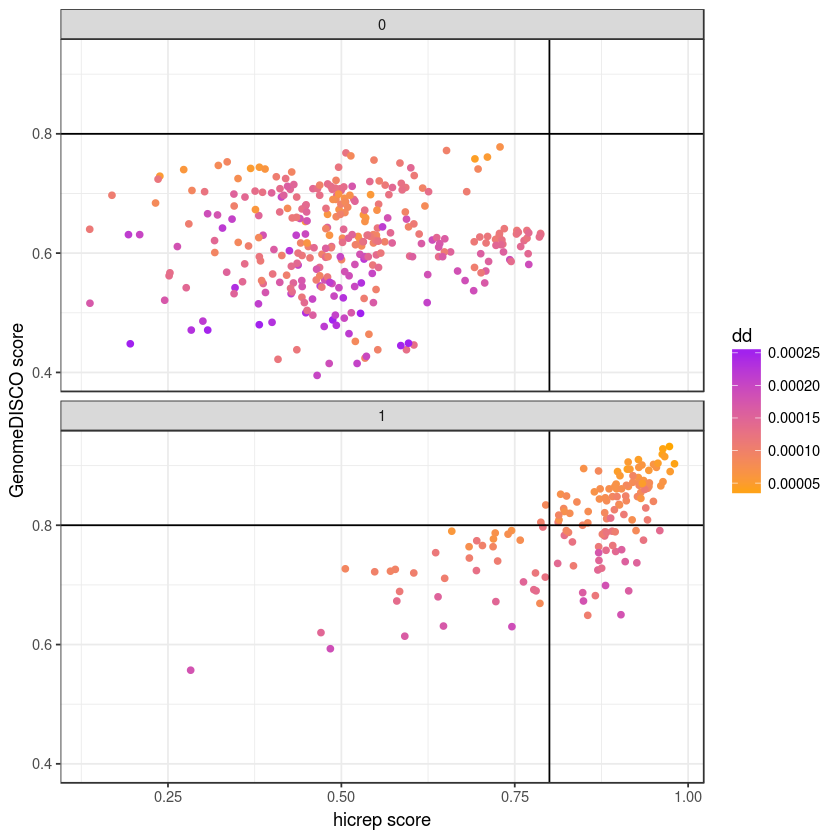

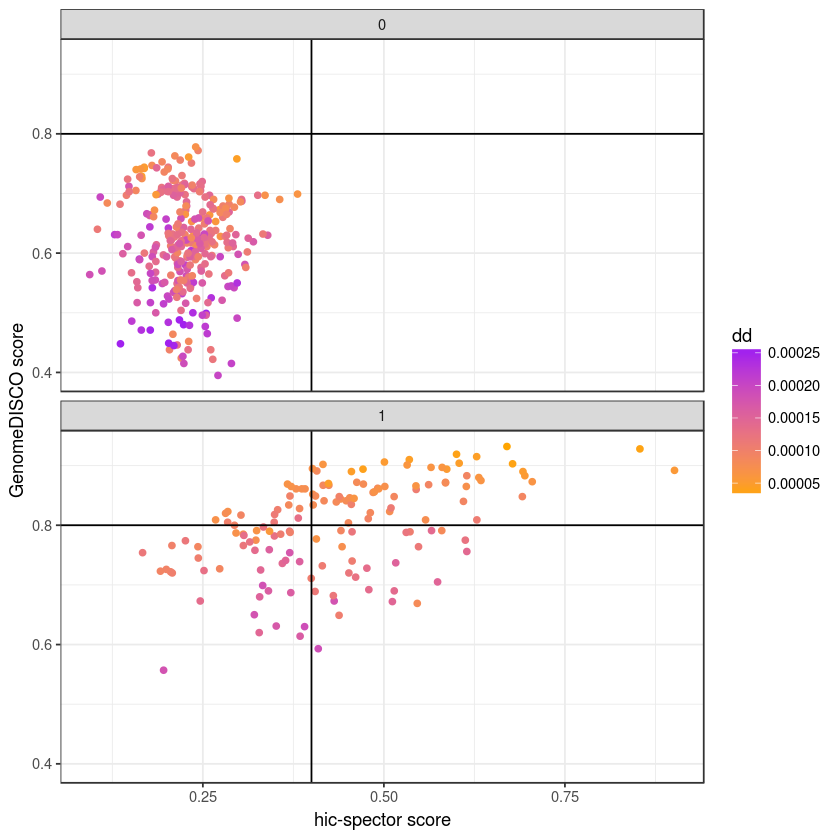

[1] "plotting"


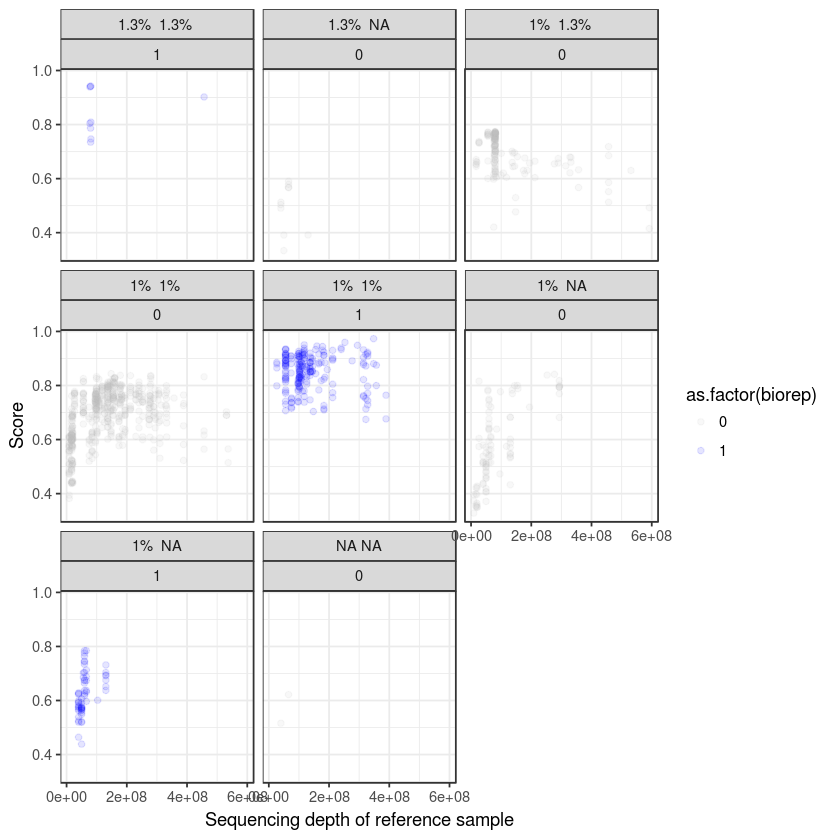

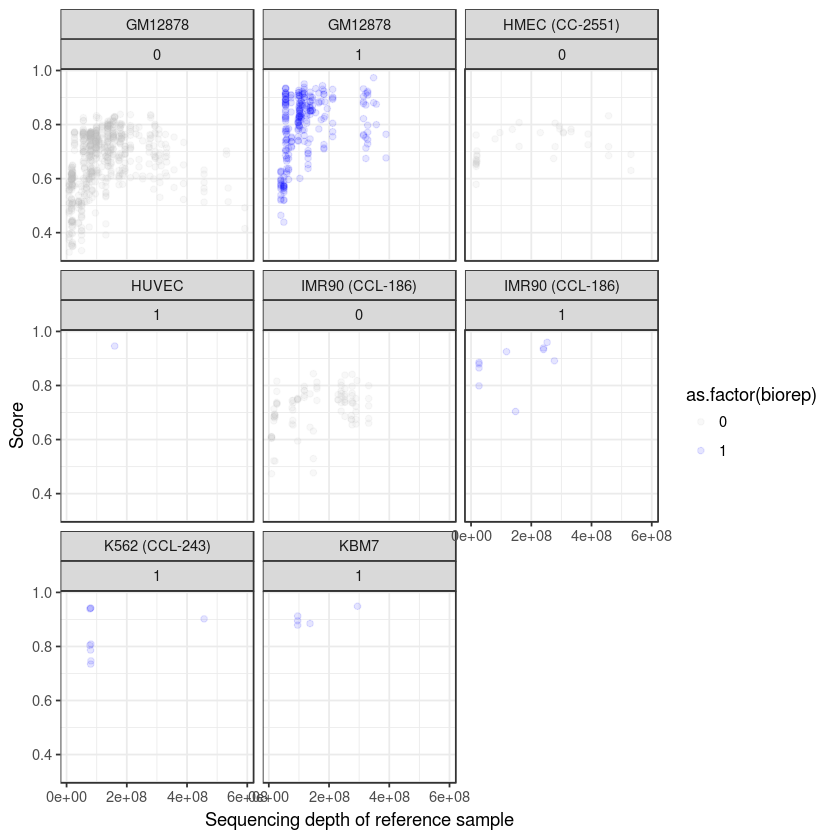

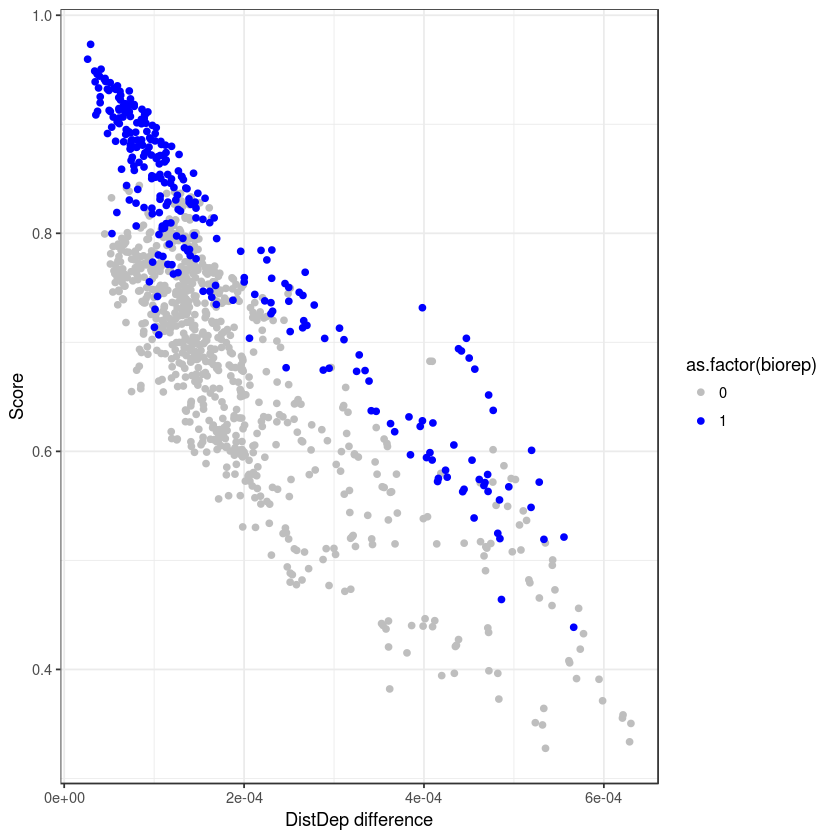

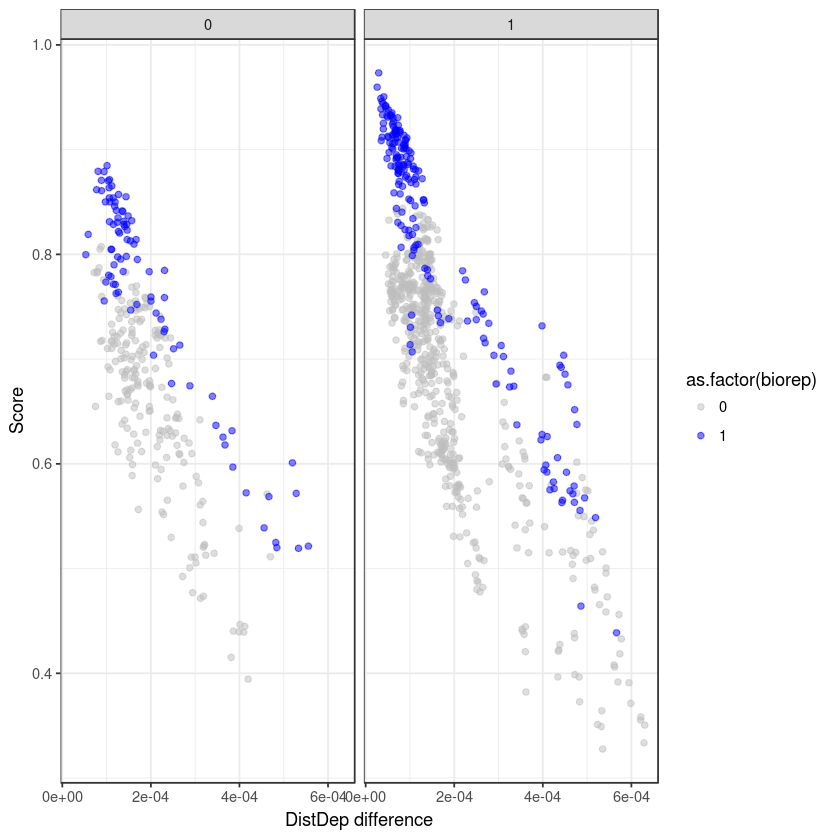

png 
  2

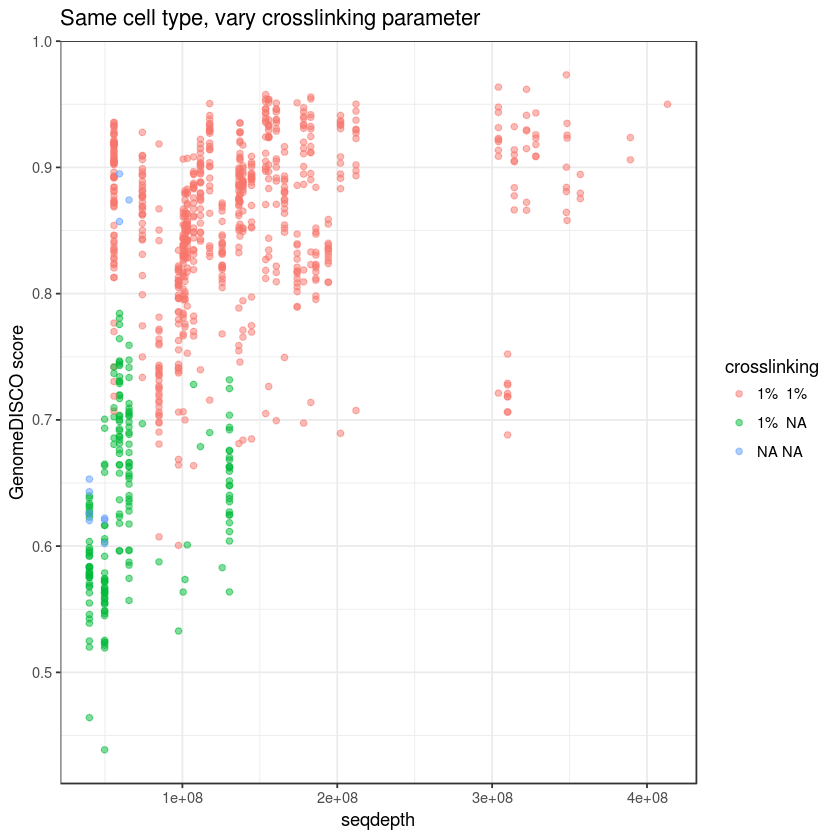

In [21]:
plot_scores=function(scores_f,metadata,scorename){
    print('plotting')
    scores=read.table(scores_f)
    
    #symmetrize scores
    scores_b=data.frame(scores[,2],scores[,1],scores[,3])
    #colnames(scores_b)=colnames(scores)
    #scores=rbind(scores,scores_b)
    
    #annotate scores with seq depth of sample1 and with whether it's biorep or nonrep
    scores=data.frame(scores,seqdepth=apply(data.frame(metadata[as.character(scores[,1]),'totalReads'],metadata[as.character(scores[,2]),'totalReads']),1,min), #log(metadata[as.character(scores[,1]),'totalReads'],10),#
                      cell1=metadata[as.character(scores[,1]),'celltype'],
                      cell2=metadata[as.character(scores[,2]),'celltype'],
                      re1=metadata[as.character(scores[,1]),'re'],
                      re2=metadata[as.character(scores[,2]),'re'],
                      crosslinking=paste(metadata[as.character(scores[,1]),'crosslinking'],metadata[as.character(scores[,2]),'crosslinking']))
    scores=data.frame(scores,biorep=0,re=0)
    scores[which(scores[,'cell1']==scores[,'cell2']),'biorep']=1
    scores[which(scores[,'re1']==scores[,'re2']),'re']=1
    
    in_situ_samples=rownames(metadata[which(as.character(metadata$protocol)=="in situ"),])
    in_situ=intersect(which(as.character(scores[,1]) %in% in_situ_samples),which(as.character(scores[,2]) %in% in_situ_samples))
    
    scores$crosslinking=gsub("1.3%  1% ","1%  1.3% ",scores$crosslinking)
    scores$crosslinking=gsub("NA 1% ","1%  NA",scores$crosslinking)
    scores$crosslinking=gsub("NA 1.3% ","1.3%  NA",scores$crosslinking)
    
    sna=rownames(metadata[which(is.na(metadata$crosslinking)),])
    bad_crosslink=union(which(as.character(scores[,1]) %in% sna),which(as.character(scores[,2]) %in% sna))
    good_seqdepth=which(scores$seqdepth>=100000000)
    mbo=intersect(which(as.character(scores[,1]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])),
              which(as.character(scores[,2]) %in% rownames(metadata[which(as.character(metadata$re)=='MboI'),])))
    keep=intersect(setdiff(intersect(in_situ,good_seqdepth),bad_crosslink),in_situ) #mbo
    s_now=scores[keep,][order(scores[keep,'V3']),c('V1','V2','V3','biorep')]
    write.table(scores[keep,],'~/disco.rao.scores.txt',quote=F,row.names=F,col.names=F,sep='\t')
    scores=scores[order(scores$biorep),]
    #print(s_now[which(s_now$biorep==1),])
    
    print(ggplot(scores[keep,],aes(x=seqdepth,y=V3,color=as.factor(biorep)))+
          xlab('Sequencing depth of reference sample')+ylab('Score')+
          geom_point(alpha=0.1)+theme_bw()+scale_color_manual(values = c("gray","blue"))+facet_wrap(~crosslinking*biorep))
    
    print(ggplot(scores[keep,],aes(x=seqdepth,y=V3,color=as.factor(biorep)))+
          xlab('Sequencing depth of reference sample')+ylab('Score')+
          geom_point(alpha=0.1)+theme_bw()+scale_color_manual(values = c("gray","blue"))+facet_wrap(~cell1*biorep))
    
    print(ggplot(scores[keep,],aes(x=V8,y=V3,color=as.factor(biorep)))+
          xlab('DistDep difference')+ylab('Score')+
          geom_point()+theme_bw()+scale_color_manual(values = c("gray","blue")))
    
    print(ggplot(scores[keep,],aes(x=V8,y=V3,color=as.factor(biorep)))+
          xlab('DistDep difference')+ylab('Score')+
          geom_point(alpha=0.5)+theme_bw()+scale_color_manual(values = c("gray","blue"))+facet_wrap(~re))
    
    #focus on 1% crosslinked vs NA crosslinked bioreps
    in_situ_samples=rownames(metadata[which(grepl('in situ',metadata$protocol)),])
    in_situ=intersect(which(as.character(scores[,1]) %in% in_situ_samples),which(as.character(scores[,2]) %in% in_situ_samples))
    
    s1=rownames(metadata[which(as.character(metadata$crosslinking)=="1% "),])
    sna=rownames(metadata[which(is.na(metadata$crosslinking)),])
    keep=unique(c(s1,sna))
    biorep_samples=intersect(which(scores[,'biorep']==1),which(as.character(scores[,'cell1'])=='GM12878'))
    scores_keep=scores[intersect(intersect(biorep_samples,in_situ),
                                 intersect(which(as.character(scores[,1]) %in% keep),which(as.character(scores[,2]) %in% keep))),]
    print(ggplot(scores_keep,aes(x=seqdepth,fill=crosslinking,y=V3,color=crosslinking))+
          geom_point(alpha=0.5)+theme_bw()+scale_fill_manual(values = c("lightblue","gray","gray"))+
          ylab(scorename)+ggtitle("Same cell type, vary crosslinking parameter"))
    
    require(PRROC)
    scores_0=scores[which(as.character(scores[,'biorep'])=='0'),3]
    scores_1=scores[which(as.character(scores[,'biorep'])=='1'),3]
    roc=roc.curve(scores.class0=scores[,3], weights.class0=scores[,'biorep'],curve=TRUE)
    pr=pr.curve(scores.class0=scores[,3], weights.class0=scores[,'biorep'],curve=TRUE)
    #plot(roc)
    #plot(pr)
    
    scores_short=scores
    scores_short[,1]=gsub('HIC0','',as.character(scores_short[,1]))
    scores_short[,2]=gsub('HIC0','',as.character(scores_short[,2]))
    samples=unique(c(scores_short[,1],scores_short[,2]))
    samples=samples[order(samples)]

    m=as.matrix(array(0,dim=c(length(samples),length(samples))))
    rownames(m)=colnames(m)=samples
    for (i in c(1:(dim(scores_short)[1]))){
        n1=as.character(scores_short[i,1])
        n2=as.character(scores_short[i,2])
        v=scores_short[i,3]
        m[n1,n2]=v
        m[n2,n1]=v
    }
    
    pdf('~/raoscores.pdf',height=30,width=30)
    #pheatmap(m,cluster_cols=FALSE,cluster_rows=FALSE,display_numbers=TRUE,number_format = "%.2f",fontsize=5)
    dev.off()

}

scorefile='/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/plots/disco.scores.txt'
plot_scores(scorefile,metadata,'GenomeDISCO score')

In [16]:
print(min(c(1,2,3),c(2,1,4)))

[1] 1
